**Health Insurance Costs Analysis**

This analysis will help health insurance companies to learn factors that affect insurance costs.

The dataset used for the analysis includes the columns: age, sex, bmi, smoker, children, region and charges (insurance costs).

Tobacco users can pay up to 50% or more for health insurance. The analysis will be performed to compare prices between smokers and non smokers.

Gender can infuence the health insurance costs. One assumption is that men pay more because women live longer than men.  We will analyze the data to compare health insurance costs between female and male genders. 

The analysis will help to answer the questions below:

*   Are insurance prices higher for smokers than for non-smokers?
*   Are insurance prices higher for men than for women?

Two t-test will be run to prove the hypotheses:

1.-

**Null hypothesis: H0: u1-u2=0**
    There is not difference in insurance prices between non-smokers and smokers

  **Alternative hypothesis: Ha: μ ≠ μ0**
    There is difference in insurance prices between non-smokers and smokers 

2.-

**Null hypothesis: H0: u1-u2=0**
	There is not difference in insurance prices between the male gender and    the female gender

  **Alternative hypothesis: Ha: μ ≠ μ0**
    There is difference in insurance prices between the male gender and the female gender



##Import dataset stored in Google Drive into Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Modules

In [16]:
# import & alias modules
import math 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

##Dataset

In [3]:
#read in data
insurance = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/insurance.csv')
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# see the first 5 rows of the dataframe
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# See the descriptive statistics
insurance.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Find number of records for smokers and non-smokers

print('There are',insurance[insurance['smoker'] == 'no']['smoker'].count(),'non-smokers')
print('There are',insurance[insurance['smoker'] == 'yes']['smoker'].count(),'smokers')

There are 1064 non-smokers
There are 274 smokers


In [ ]:
# Find number of records for female and male genders
print('There are',insurance[insurance['sex'] == 'female']['sex'].count(),'females')
print('There are',insurance[insurance['sex'] == 'male']['sex'].count(),'males')

There are 662 females
There are 676 males


In [ ]:
# Create a crosstab of record count for smoker/non smokers and gender
pd.crosstab(insurance['smoker'], insurance['sex'])


sex,female,male
smoker,,
no,547,517
yes,115,159


In [21]:
# Means for the columns based on smokers and non-smokers groups
smoker_df = insurance.groupby('smoker').mean().round(2)
smoker_df.head()

,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [30]:
# Means for the columns based on gender
sex_df = insurance.groupby('sex').mean().round(2)
sex_df.head()

,age,bmi,children,charges
sex,,,,
female,39.50,30.38,1.07,12569.58
male,38.92,30.94,1.12,13956.75


## Visualizations

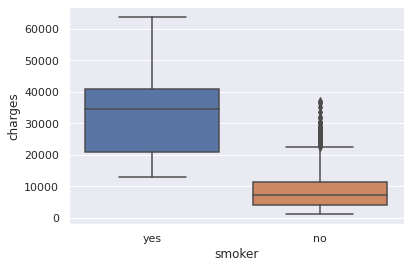

In [ ]:
# Make a boxplot to visualize our difference 
# between smokers Prices and non-smokers prices
sns.boxplot(y = insurance['charges'], x = insurance['smoker']) 


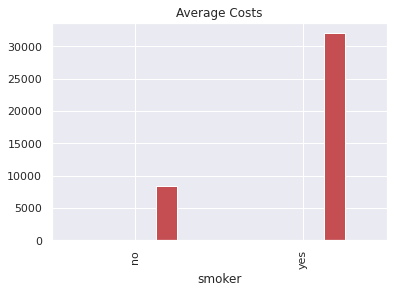

In [29]:
#Make a bar chart of means of smokers and non-smokers
smoker_df.plot(kind = "bar", legend = False, title = "Average Costs")


The graph shows a difference between insurance prices means for smokers and non-smokers

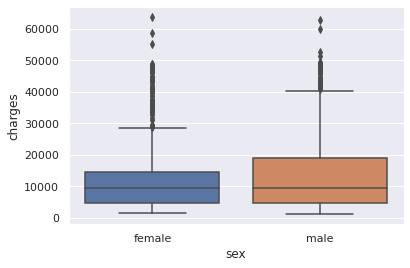

In [ ]:
# Make a boxplot to visualize our difference
# between female and male insurance prices
sns.boxplot(y = insurance['charges'], x = insurance['sex'])  


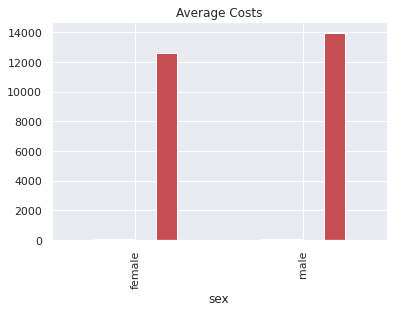

In [31]:
#Make a bar chart of means of female and male
sex_df.plot(kind = "bar", legend = False, title = "Average Costs")


There is a small difference between insurance prices means for female and male.

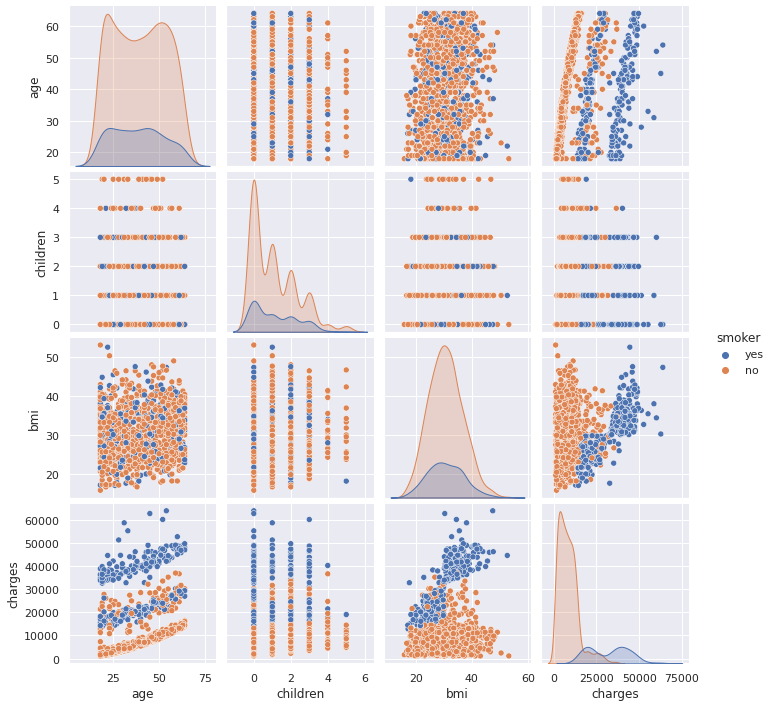

In [ ]:
# Make a pairplot of the insurance DataFrame, seen by the smoker catergory
sns.pairplot(insurance[['age','children', 'bmi','charges','smoker','sex']], 
             hue = 'smoker')

The graph shows a linear correlation between bmi and charges variables when it involves smokers. 

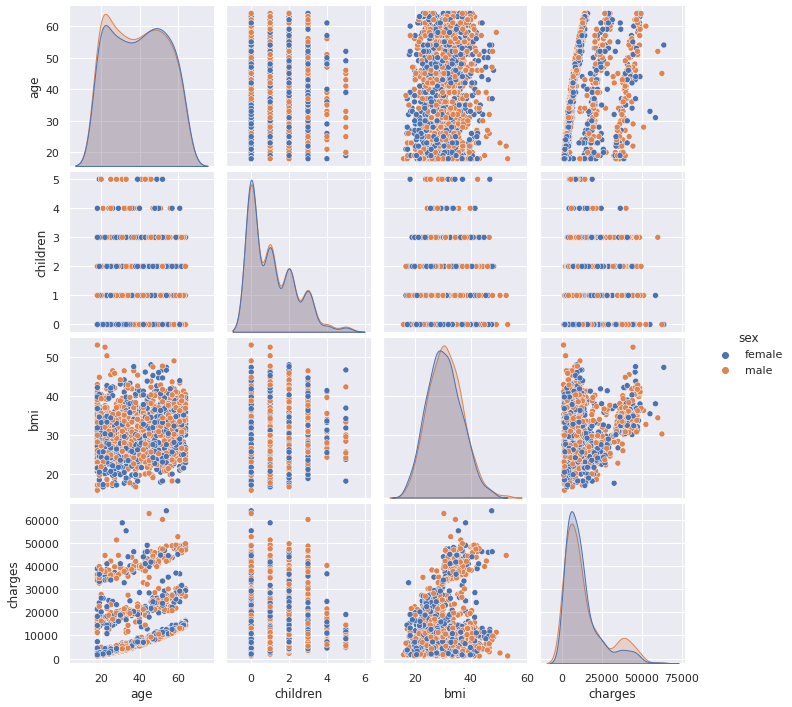

In [ ]:
# Make a pairplot of the insurance DataFrame, seen by the sex category.
sns.pairplot(insurance[['age','children', 'bmi','charges','smoker','sex']], 
             hue = 'sex')

The graph shows does not show any correlation based on sex between the variables.

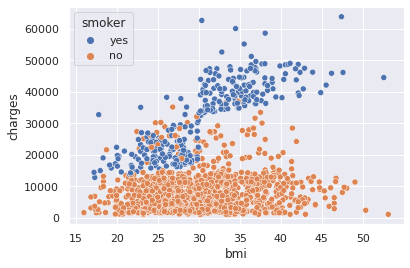

In [ ]:
# Make a scatterplot of insurance prices
# with smoker and non-smokers represented by color
sns.scatterplot(x='bmi',y='charges', hue='smoker', data=insurance)

There graph shows that there is a relationship between bmi and charges for smokers. We can see that while the bmi increases, the charges are higher. 

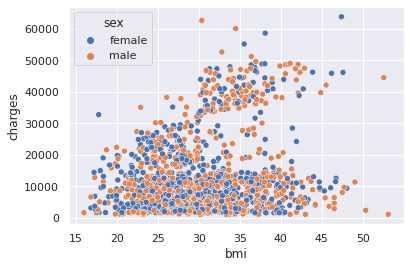

In [ ]:
# Make a scatterplot of 2013 price
# with Terminal Market represented by color
sns.scatterplot(x='bmi', y='charges', hue='sex', data=insurance)

While for sex, there is not a relationship between the bmi and charges variables

## Analyze the dataset

A correlation test and two t-test will be run in the sections of code below.
The ***smoker*** and ***sex*** categories will be our independent variables and ***charges*** is our continuous variable,

***Smoker***

In [4]:
# Split the data for a correlation test and t-test for smoker 

insurance_smoker = insurance.loc[insurance['smoker'] == 'yes']
insurance_no_smoker = insurance.loc[insurance['smoker'] == 'no']

In [ ]:
# see the first 5 rows of the dataframe for smokers
insurance_smoker.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [ ]:
# see the first 5 rows of the dataframe for non-smokers
insurance_no_smoker.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


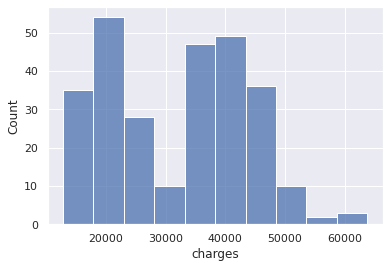

In [ ]:
# Plot the distribution of smokers insurance prices with histograms
sns.histplot(insurance_smoker["charges"]) 

The distribution of these variables are not approximately normal. This distribution has two distinct peaks. That means, several values ocurr most frequently in the dataset.

In [ ]:
# See the descriptive statistics of smokers insurance prices
insurance_smoker["charges"].describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [5]:
def series_statistics(column):
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
series_statistics(insurance_smoker['charges'])

The mode value in the column: 0      12829.45510
1      13747.87235
2      13844.50600
3      14283.45940
4      14455.64405
          ...     
269    55135.40209
270    58571.07448
271    60021.39897
272    62592.87309
273    63770.42801
Length: 274, dtype: float64
The median value in the column: 34456.348450000005
The mean of the column: 32050.23183153285


The average cost of health insurance for smokers is $32,050

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

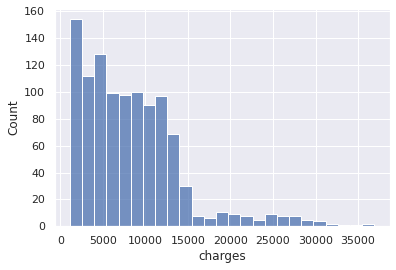

In [ ]:
# Plot the distribution of non-smokers insurance prices with histograms
sns.histplot(insurance_no_smoker["charges"]) 

The distribution of these variables are not approximately normal. The distribution is skewed right.

In [ ]:
# See the descriptive statistics
insurance_no_smoker["charges"].describe()

count     1064.000000
mean      8434.268298
std       5993.781819
min       1121.873900
25%       3986.438700
50%       7345.405300
75%      11362.887050
max      36910.608030
Name: charges, dtype: float64

In [6]:
def series_statistics(column):
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
series_statistics(insurance_no_smoker['charges'])

The mode value in the column: 0    1639.5631
dtype: float64
The median value in the column: 7345.4053
The mean of the column: 8434.268297856199


The average cost of health insurance for non-smokers is $8,434

**Correlation test for smokers**

In [ ]:
# Test for correlation between bmi and charges for smokers
stats.pearsonr(insurance_smoker['bmi'],insurance_smoker['charges'])

(0.8064806070155405, 5.019668631795185e-64)

There is a statistically significant correlation between bmi and charges variables in the population at p<0.05

***Sex Category***

In [7]:
# Split the data for a t-test for sex 
# female/male
insurance_f = insurance.loc[insurance['sex'] == 'female']
insurance_m = insurance.loc[insurance['sex'] == 'male']

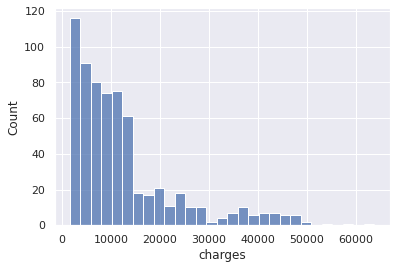

In [ ]:
# Plot the distribution female insurance prices with histograms
sns.histplot(insurance_f["charges"])

The distribution of these variables are not approximately normal. The shape distribution is skewed right.

In [ ]:
# See the descriptive statistics
insurance_f["charges"].describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

The average cost of health insurance for women is $12,569

In [8]:
def series_statistics(column):
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
series_statistics(insurance_f['charges'])

The mode value in the column: 0       1607.51010
1       1615.76670
2       1621.88270
3       1622.18850
4       1629.83350
          ...     
657    48824.45000
658    48885.13561
659    55135.40209
660    58571.07448
661    63770.42801
Length: 662, dtype: float64
The median value in the column: 9412.9625
The mean of the column: 12569.57884383534


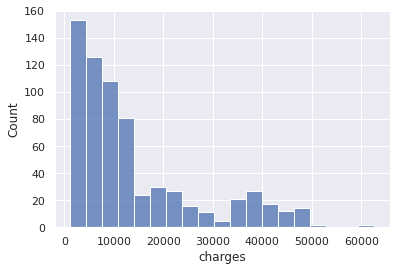

In [ ]:
# Plot the distribution of male insurance prices with histograms
sns.histplot(insurance_m["charges"]) 

The distribution of these variables are not approximately normal. The shape distribution is skewed right.

In [ ]:
# See the descriptive statistics
insurance_m["charges"].describe()

count      676.000000
mean     13956.751178
std      12971.025915
min       1121.873900
25%       4619.134000
50%       9369.615750
75%      18989.590250
max      62592.873090
Name: charges, dtype: float64

The average price of health insurance for men is $13,956

In [9]:
def series_statistics(column):
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
series_statistics(insurance_m['charges'])

The mode value in the column: 0    1639.5631
dtype: float64
The median value in the column: 9369.61575
The mean of the column: 13956.751177721886


***Run two sample*** ***t***-***test***

**1.-**

**Null hypothesis: H0: u1-u2=0** There is not difference in insurance prices between non-smokers and smokers

**Alternative hypothesis: Ha: μ ≠ μ0** There is difference in insurance prices between non-smokers and smokers

In [ ]:
# Run t-test
stats.ttest_ind(insurance_smoker['charges'], insurance_no_smoker['charges'])

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

The t-value indicates that there is 46.6 standard deviations between the two samples. The p-value is extremely small, implying that there is a real difference.
We can reject the null hyphotesis that there is not significant difference between the prices of smokers and non-smokers at p < 0.05.

> We can conclude that insurance costs for smokers are higher than insurance costs for non-smokers.


**2.-**

**Null hypothesis: H0: u1-u2=0** There is not difference in insurance prices between the male gender and the female gender

**Alternative hypothesis: Ha: μ ≠ μ0** There is difference in insurance prices between the male gender and the female gender

In [ ]:
#  Run t-test
stats.ttest_ind(insurance_m['charges'], insurance_f['charges'])

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)

The t=value indicates that there is a difference of 2.09 standard deviation between the two samples. The p-value is less than < 0.05.

We can reject the null hypothesys that there is not a significant difference between the insurance prices of  women and men genders at p < 0.05.

>We conclude that insurance costs for men are higher than insurance costs for women

# **Recommendation**

Since there is a high difference in the average of insurance prices for smokers over non-smokers ($23,615.97) and a correlation between the body mass index and smokers exists. My recommendations for insurance companies are:

1.	Gather more data points along:
  a.	Cholesterol Levels
  b.	Blood Sugar Levels
  c.	Vaccination Status (Covid, Influenza, Hepatitis, Pnuemonia)
  d.	Heart Rate
  e.	Blood Pressure
2.	Offer medical insurance premium discounts for current smokers to enter smoking deterrence programs.
3.	Offer medical insurance monthly premium discounts at three tiers, for current obese medical insurance policy holders, to receive lower medical insurance rates. If an obese policy holder is currently overweight, then they can receive a monthly discount. For example:
  a.	5% of their monthly policy for losing 5% of their body weight
  b.	10% of their monthly policy for losing 10% of their body weight
  c.	20% of their monthly policy for losing 20% of their body weight
4.	Offer medical insurance monthly premium discounts, for current obese policy holders, to enter an approved physical fitness plan.
5.	Create an insurance policy requirement to collect data points from Item 1 bi-annually, on a policy holders annual physical and biometric exam and then at a 6-month follow-up from that annual physical and biometric exam.

The discounts would retain current holders and insurance companies would save money as well.